In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt # sets up plotting under plt
import seaborn as sb # sets up styles and gives us more plotting options
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


In [6]:
ds= pd.read_csv("data/games_sales_clean.csv", header="infer")
indexNames = ds[ ds['Year_of_Release'] > 2016.0].index
# Delete these row indexes from dataFrame
ds.drop(indexNames , inplace=True)
ds

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16443,Worms 2,PC,1997.0,Strategy,Microprose,0.00,0.01,0.00,0.00,0.01
16444,Victory Spike,PS,1996.0,Sports,Imagineer,0.00,0.00,0.01,0.00,0.01
16445,Meru Purana,PS,1996.0,Strategy,Gust,0.00,0.00,0.01,0.00,0.01
16446,Psychic Detective,PS,1995.0,Adventure,Electronic Arts,0.01,0.00,0.00,0.00,0.01


<bound method Axes.bar of <matplotlib.axes._subplots.AxesSubplot object at 0x0000023D5C2D2C10>>

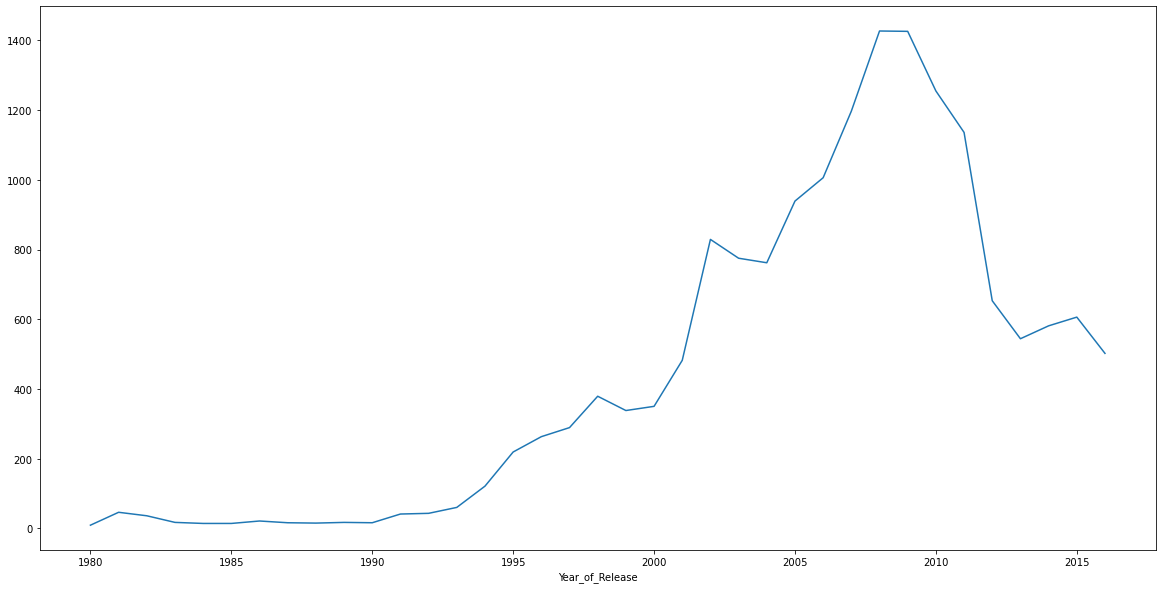

In [7]:
#Global number of games produced per year
#Count rows for every occurrence of the same year of release
prod_for_year = ds.groupby(['Year_of_Release']).Name.count()



#sns.barplot(x=ds['Year_of_release'], y=sales_data.index)
prod_for_year.plot(figsize=(20,10)).bar

We observe that the most interesting section of time is from 2000. It is more related to our analysis because of cultural and economical reasons.


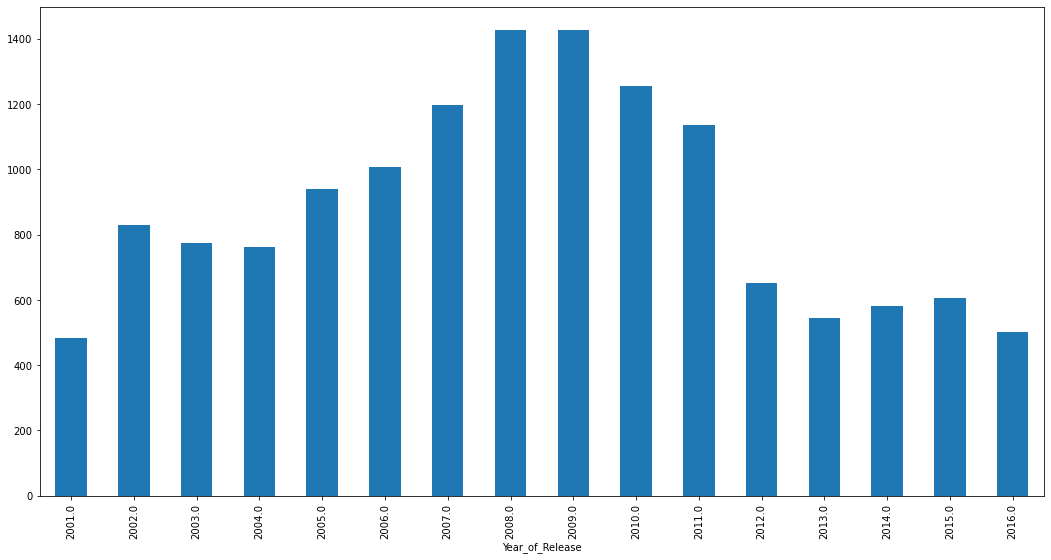

In [8]:
print("We observe that the most interesting section of time is from 2000. It is more related to our analysis because of cultural and economical reasons.")

indexNames = ds[ ds['Year_of_Release'] <=2000].index
ds.drop(indexNames , inplace=True)

prod_for_year_restricted=ds.groupby(["Year_of_Release"]).Name.count()

prod_for_year_restricted.plot.bar(figsize =(18,9))

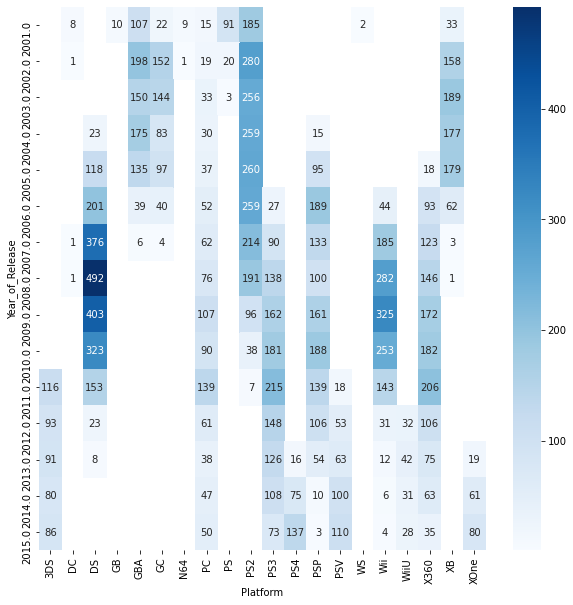

In [5]:
prod_for_year_plat = ds.groupby(['Year_of_Release','Platform']).Name.count()
prod_for_year_plat = prod_for_year_plat.unstack('Platform')

plt.figure(figsize=(10,10))
sb.heatmap(prod_for_year_plat, annot=True,cmap='Blues', fmt='g')
plt.show()

<bound method Axes.bar of <matplotlib.axes._subplots.AxesSubplot object at 0x000002642D796EB0>>

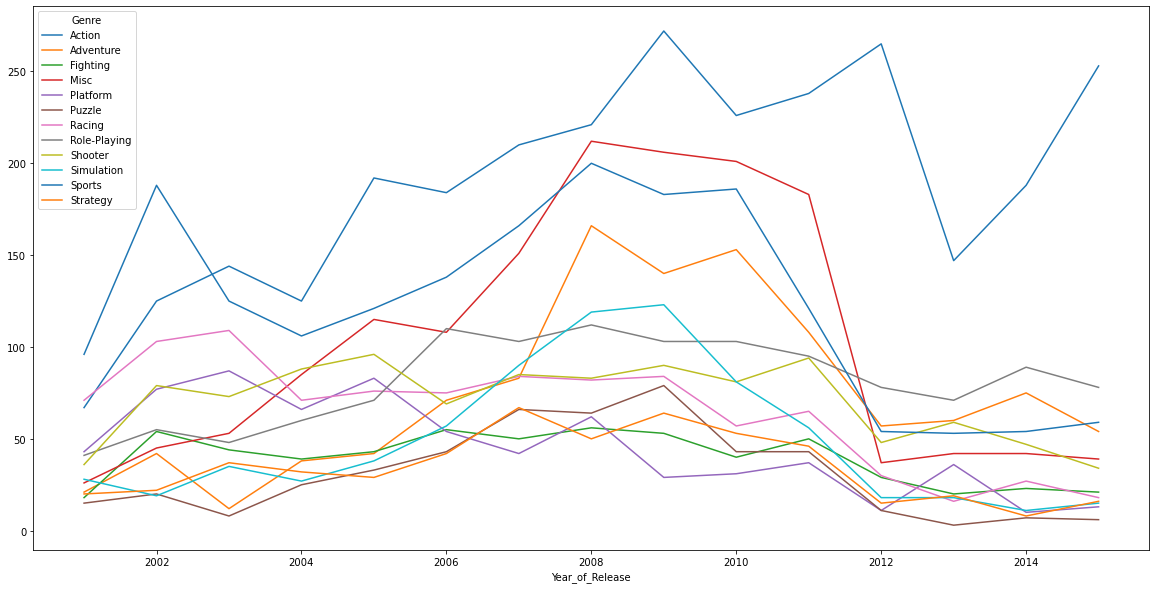

In [6]:
#grouped for genre

prod_for_year_genre = ds.groupby(['Year_of_Release','Genre']).Name.count()
prod_for_year_genre = prod_for_year_genre.unstack('Genre')

prod_for_year_genre.plot(figsize=(20,10)).bar



We opted for a zoomed analysis through selecting just four main genres: Action, Shooter, RolePlaying and Sports.


<bound method Axes.bar of <matplotlib.axes._subplots.AxesSubplot object at 0x000002642D796640>>

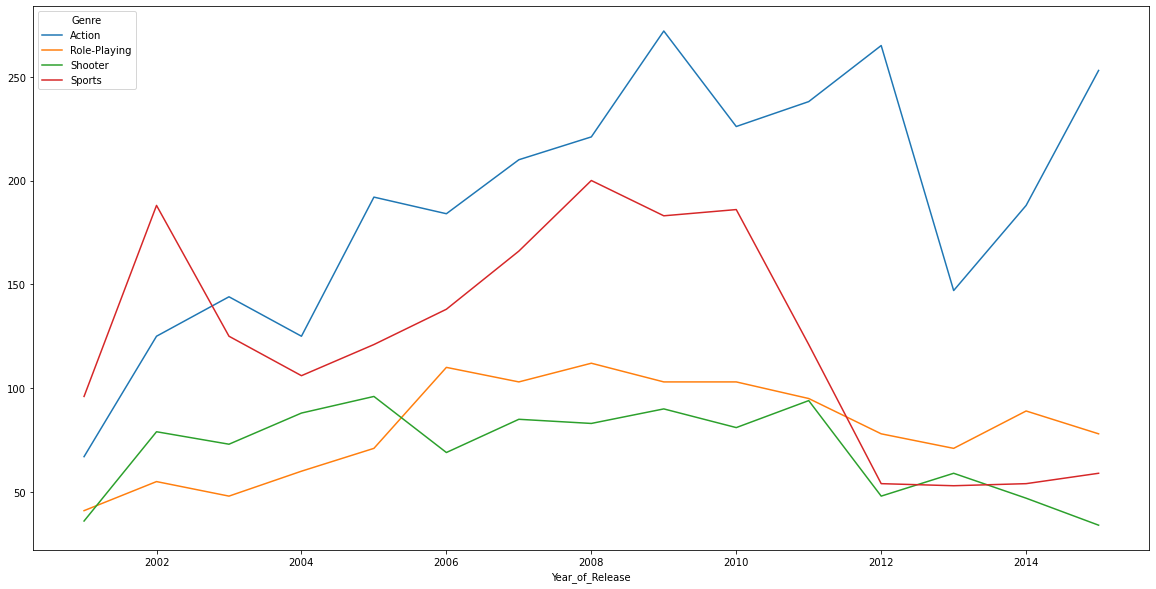

In [7]:
print("We opted for a zoomed analysis through selecting just four main genres: Action, Shooter, RolePlaying and Sports.")

df = prod_for_year_genre
prod_for_year_genre_restricted = df.drop(['Adventure','Fighting','Misc','Platform','Puzzle','Racing','Simulation','Strategy'],axis=1)
prod_for_year_genre_restricted.plot(figsize=(20,10)).bar

In [8]:
indexes = ds[(ds['Genre'] == 'Adventure') & (ds['Genre'] == 'Fighting') & (ds['Genre'] == 'Misc') & (ds['Genre'] == 'Platform') & (ds['Genre'] == 'Puzzle') & (ds['Genre'] == 'Racing') | ( ds['Genre'] == 'Simulation') & (ds['Genre'] == 'Strategy')].index
ds.drop(indexes,inplace= True)


In [9]:
print("1st trial: Linear Regression. Our original supposition is that it won't work properly because of the previous observations on the data.")
print("Linear regression will be applied in order to predict the number of videogames production")

1st trial: Linear Regression. Our original supposition is that it won't work properly because of the previous observations on the data.
Linear regression will be applied in order to predict the number of videogames production


In [10]:
def lin_fun(theta, x):
    
    return theta[1]*x + theta[0]


# Quadratic loss function
def quad_loss(theta, x, y, h):
    
    m = len(x)
    l = 0
    
    for i in range(0,m):
        l += (h(theta,x[i])-y[i])**2/(2*m)
    
    return l

# Gradient of loss function
def grad_quad_loss(theta, x, y, h):
    
    m = len(x)
    G = np.zeros(len(theta))
    
    for i in range(0,m):
        for j in range(len(theta)):
            G[j] += (h(theta,x[i])-y[i])/m * x[i]**j
    
    return G



def gradient_descent(theta,x,y,H,alpha,eps):
       
    loss_history = []
    theta_history = []
    
    while np.linalg.norm(alpha*grad_quad_loss(theta, x, y, H))>=eps:
        theta_history.append(theta)
        loss_history.append(quad_loss(theta,x,y,H))
        theta = theta - alpha*grad_quad_loss(theta, x, y, H)
        #print(quad_loss(theta,x,y,H), np.linalg.norm(alpha*grad_quad_loss(theta, x, y, H)))
        
    return theta, loss_history, theta_history

In [11]:
genres = ['Action','Role-Playing','Shooter','Sports']
col = ['blue', 'orange', 'green', 'red']

# contains the year of release as x-values
x = np.array(prod_for_year_genre_restricted.index.to_list())-2000
# contains the sales figures as y-values
y = np.empty((len(genres), len(x)))
for i,gen in enumerate(genres):
    y[i] = prod_for_year_genre_restricted[gen].to_list()



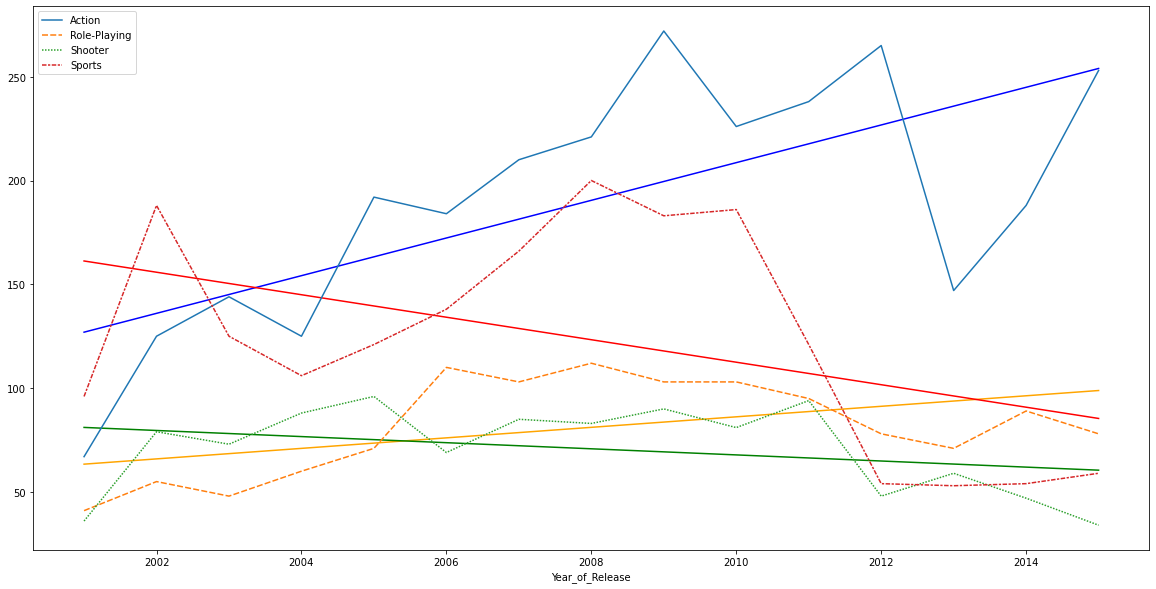

In [12]:

# Determine the parameters and output the results    
plt.figure(figsize=(20,10))

for i,gen in enumerate(genres):
    
    # Initialize theta0
    theta0 = np.zeros(2)

    # Determine parameters using Gradient descent
    theta_final, loss_history, theta_history = gradient_descent(theta0,x,y[i],lin_fun,0.0001, 1e-6)
    
#     fig,ax = plt.subplots(num=2)

#     ax.set_ylabel('l(Theta)')
#     ax.set_xlabel('Iterations')
#     _=ax.plot(range(len(loss_history))[1:],loss_history[1:],'b.')
#     plt.show()
    
    plt.plot(x+2000, lin_fun(theta_final, x), color=col[i])

sb.lineplot(data=prod_for_year_genre_restricted)
plt.show()

In [13]:
def poly2_fun(theta, x):
    
    return theta[2]*x**2 + theta[1]*x + theta[0]

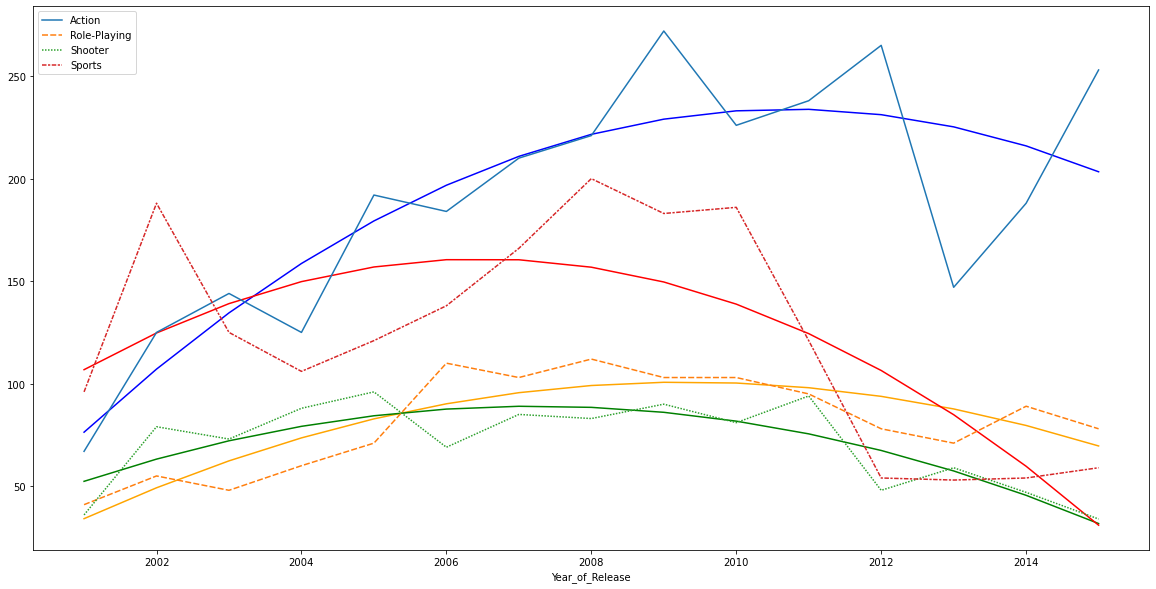

In [14]:
plt.figure(figsize=(20,10))

for i,gen in enumerate(genres):
    
    theta0 = np.zeros(3)

    # Determine parameters using Gradient descent
    theta_final, loss_history, theta_history = gradient_descent(theta0,x,y[i],poly2_fun,0.0001, 1e-6)
    
    plt.plot(x+2000, poly2_fun(theta_final, x), color=col[i])

sb.lineplot(data=prod_for_year_genre_restricted)
plt.show()

In [15]:
print("Predict number of released games in 2018")

Predict number of released games in 2018


In [24]:
pred = lin_fun(theta_final, 18)

    
pred

504.47693729588457

In [26]:
print("The actual total of games released in 2018 is 974. Source: https://www.vg247.com/2018/12/18/every-game-released-pc-ps4-xbox-one-switch-2018/")

The actual total of games released in 2018 is 974. Source: https://www.vg247.com/2018/12/18/every-game-released-pc-ps4-xbox-one-switch-2018/
